# Table of Contents

1. [Loading datas](#1-bullet) <br>
    <br>
    
2. [Jointure of dataframes](#2-bullet) <br>
    I - [bureau_balance and bureau](#3-bullet) <br>
    II - [bureau and application_data](#4-bullet) <br>
    III - [previous_application and application_data](#5-bullet) <br>
    IV - [credit_card_balance and application_data](#6-bullet) <br>
    V - [POS_CASH_balance and application_data](#7-bullet) <br>
    VI - [installments_payments and application_data](#8-bullet) <br>
    <br>

3. [Feature engineering](#9-bullet) <br>
    <br>

# 1. Loading datas <a class="anchor" id="1-bullet"></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

from P7_functions import *

from sklearn.impute import SimpleImputer

In [2]:
application_data = pd.read_csv('./Datas/application_train.csv', sep=',')

bureau = pd.read_csv('./Datas/bureau.csv', sep=',')
bureau_balance = pd.read_csv('./Datas/bureau_balance.csv', sep=',')

previous_application = pd.read_csv('./Datas/previous_application.csv', sep=',')
installments_payments = pd.read_csv('./Datas/installments_payments.csv', sep=',')
credit_card_balance = pd.read_csv('./Datas/credit_card_balance.csv', sep=',')
POS_CASH_balance = pd.read_csv('./Datas/POS_CASH_balance.csv', sep=',')

In [3]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 250)

In [4]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [5]:
# Number of default payments
application_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [6]:
# As of %
application_data['TARGET'].value_counts().apply(lambda p: p / application_data['TARGET'].count())

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [7]:
application_data.isna().mean()[application_data.isna().mean() > 0.01].sort_values(ascending=False)

COMMONAREA_MEDI                 0.698723
COMMONAREA_AVG                  0.698723
COMMONAREA_MODE                 0.698723
NONLIVINGAPARTMENTS_AVG         0.694330
NONLIVINGAPARTMENTS_MEDI        0.694330
NONLIVINGAPARTMENTS_MODE        0.694330
FONDKAPREMONT_MODE              0.683862
LIVINGAPARTMENTS_MODE           0.683550
LIVINGAPARTMENTS_MEDI           0.683550
LIVINGAPARTMENTS_AVG            0.683550
FLOORSMIN_MEDI                  0.678486
FLOORSMIN_MODE                  0.678486
FLOORSMIN_AVG                   0.678486
YEARS_BUILD_AVG                 0.664978
YEARS_BUILD_MEDI                0.664978
YEARS_BUILD_MODE                0.664978
OWN_CAR_AGE                     0.659908
LANDAREA_AVG                    0.593767
LANDAREA_MEDI                   0.593767
LANDAREA_MODE                   0.593767
BASEMENTAREA_MODE               0.585160
BASEMENTAREA_AVG                0.585160
BASEMENTAREA_MEDI               0.585160
EXT_SOURCE_1                    0.563811
NONLIVINGAREA_AV

# 2. Jointure of dataframes <a class="anchor" id="2-bullet"></a>

We will merge dataframes at our disposal to get one unique dataframe. This will involve doing some feature engineering and loosing a bit of information to be able to merge. The links between the dataframes are described below :

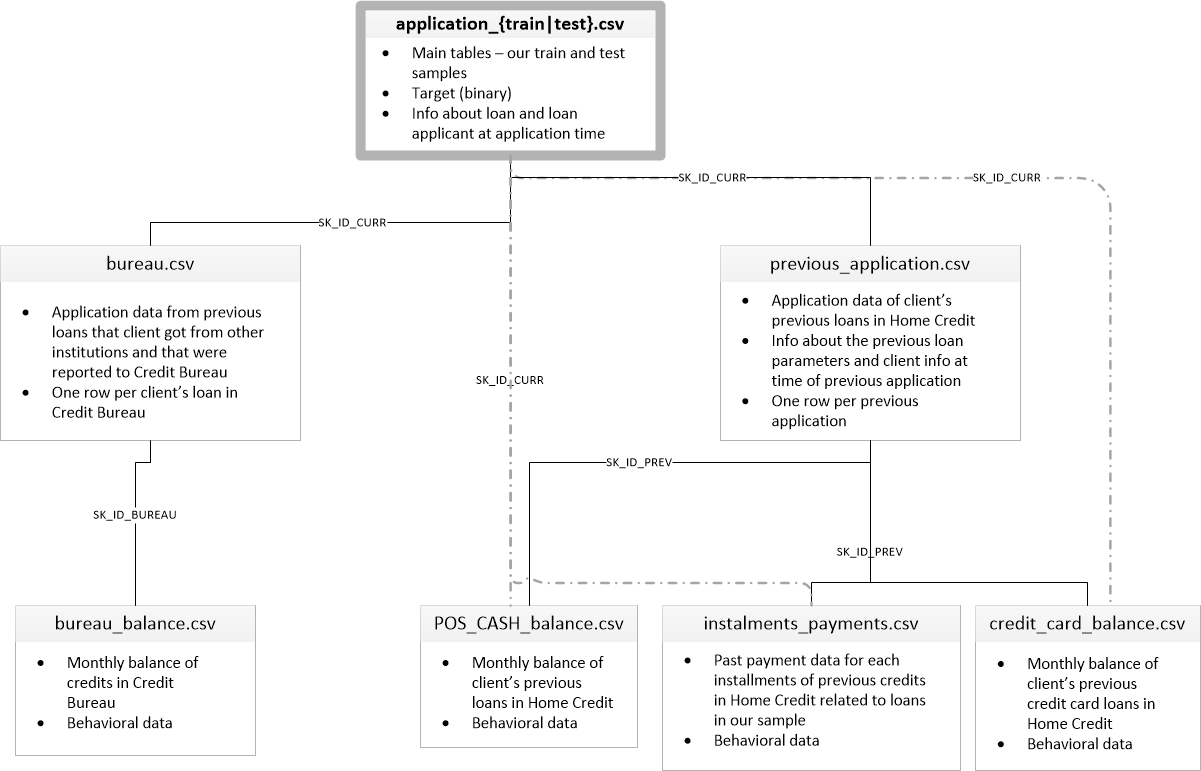

## I - bureau_balance and bureau <a class="anchor" id="3-bullet"></a>

The dataframe bureau_balance gives us the monthly balance and status for each loan recorded in bureau (several rows for each loan, FK : SK_ID_BUREAU). We will synthetize monthly elements to get one row per SK_ID_BUREAU

### a. Analysis of bureau_balance

In [8]:
print(bureau.shape)
bureau.head()

(1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [9]:
bureau.isna().sum()[bureau.isna().sum() > 0]

DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_ANNUITY               1226791
dtype: int64

In [10]:
print(bureau_balance.shape)
bureau_balance.head()

(27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [11]:
bureau_balance.isna().sum()[bureau_balance.isna().sum() > 0]

Series([], dtype: int64)

In [12]:
# Looking possible status values
bureau_balance['STATUS'].unique()

array(['C', '0', 'X', '1', '2', '3', '5', '4'], dtype=object)

Documentation provided gives us :
- C : closed
- X : unknown status
- 0 : no DPD
- 1 to 5 : DPD with scales of days late (5 being > 120 days)

### b. Aggregations and feature engineering on bureau_balance

The df bureau_balance won't add much information given we already have the number of days overdue and the current status in bureau, 
nevertheless we will create some variables to see the evolution :

In [13]:
# Creation of a temporary df
df_temp = pd.DataFrame()

# Duration of the credit in months (only months for which the credit isn't closed) 
df_temp['CREDIT_DURATION'] = bureau_balance[bureau_balance['STATUS'] != 'C'].groupby(by='SK_ID_BUREAU')['STATUS'].apply(len)

# Percentage of time of the credit per status
status_list = list(bureau_balance['STATUS'].unique())
status_list.remove('C')

for s in status_list:
    df_temp['STATUS_' + s + '_DURATION'] = bureau_balance[bureau_balance['STATUS'] == s].groupby(by='SK_ID_BUREAU')['STATUS'].apply(len)
    df_temp['STATUS_' + s + '_PERC'] = df_temp['STATUS_' + s + '_DURATION'] / df_temp['CREDIT_DURATION']
    del df_temp['STATUS_' + s + '_DURATION']

# Replace NaN values which corresponds to 0 days for this status
df_temp.fillna(0, inplace=True)

In [14]:
# Check if sum of percentages per status = 1
df_temp['CHECK'] = df_temp['STATUS_0_PERC'] + df_temp['STATUS_X_PERC'] + df_temp['STATUS_1_PERC'] + df_temp['STATUS_2_PERC'] + df_temp['STATUS_3_PERC'] + df_temp['STATUS_4_PERC'] + df_temp['STATUS_5_PERC']
df_temp['CHECK'].mean()

1.0

In [15]:
del df_temp['CHECK']

### c. Jointure

In [16]:
# Compare bureau and df_temp to see how many (%) credit doesn't have monthly status (and so NaN after merge)
missing_status = (len(set(bureau['SK_ID_BUREAU']) - set(df_temp.index))) / len(set(bureau['SK_ID_BUREAU']))
print("Percentage of values missing for monthly status : {:.2%}".format(missing_status))

Percentage of values missing for monthly status : 55.40%


In [17]:
# Merging df_temp with bureau

bureau = bureau.join(df_temp, how='left', on='SK_ID_BUREAU')
bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
del df_temp
del bureau_balance

## II - bureau and application_data <a class="anchor" id="4-bullet"></a>

The dataframe bureau gives us information on previous loans each Home Credit client had in other financial institutions (several rows for each client, FK : SK_ID_CURR). We will synthetize elements on each loan to get one row per SK_ID_CURR

### a. Analysis of bureau

In [18]:
bureau.head()

,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,CREDIT_DURATION,STATUS_0_PERC,STATUS_X_PERC,STATUS_1_PERC,STATUS_2_PERC,STATUS_3_PERC,STATUS_5_PERC,STATUS_4_PERC
0,215354,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
bureau.shape

(1716428, 24)

In [20]:
bureau.isna().sum()[bureau.isna().sum() > 0]

DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_ANNUITY               1226791
CREDIT_DURATION            950864
STATUS_0_PERC              950864
STATUS_X_PERC              950864
STATUS_1_PERC              950864
STATUS_2_PERC              950864
STATUS_3_PERC              950864
STATUS_5_PERC              950864
STATUS_4_PERC              950864
dtype: int64

### b. Cleaning

We have a lot of annuity amounts missing, this could be a very important information to compute the total annuity of a customer with its actives credits. In order to fill missing values with an approximation, we will have to take some assumptions.

These assumptions will rely on DAYS_CREDIT_ENDDATE and AMT_CREDIT_SUM, let's look if we have some credits with missing values for both AMT_ANNUITY and DAYS_CREDIT_ENDDATE (looks like there are few for AMT_CREDIT_SUM).

In [21]:
# We focus only on active credits
active_credits = bureau[bureau['CREDIT_ACTIVE'] == 'Active']

# Computing and displaying % missing vals
perc_missing_vals = len(active_credits[(active_credits['AMT_ANNUITY'].isna()) & (active_credits['DAYS_CREDIT_ENDDATE'].isna())]) / len(active_credits) 
print("Percentage of values missing for both AMT_ANNUITY and DAYS_CREDIT_ENDDATE : {:.2%}".format(perc_missing_vals))

Percentage of values missing for both AMT_ANNUITY and DAYS_CREDIT_ENDDATE : 7.25%


In [22]:
# We also look if we have 0 or negatives values for AMT_ANNUITY and DAYS_CREDIT_ENDDATE
print("AMT_ANNUITY = 0 : {}".format(len(active_credits[active_credits['AMT_ANNUITY'] == 0])))
print("DAYS_CREDIT_ENDDATE = 0 : {}".format(len(active_credits[active_credits['DAYS_CREDIT_ENDDATE'] == 0])))
print("AMT_ANNUITY < 0 : {}".format(len(active_credits[active_credits['AMT_ANNUITY'] < 0])))
print("DAYS_CREDIT_ENDDATE < 0 : {}".format(len(active_credits[active_credits['DAYS_CREDIT_ENDDATE'] < 0])))

AMT_ANNUITY = 0 : 59259
DAYS_CREDIT_ENDDATE = 0 : 605
AMT_ANNUITY < 0 : 0
DAYS_CREDIT_ENDDATE < 0 : 76359


In [23]:
# Look DAYS_CREDIT_ENDDATE < 0 where AMT_CREDIT_SUM = 0
len(active_credits[(active_credits['DAYS_CREDIT_ENDDATE'] < 0) & (active_credits['AMT_CREDIT_SUM'] == 0)])

7250

Negatives values for the variable DAYS_CREDIT_ENDDATE could be understandable for a closed credit. However, for an active credit values should intuitively be postive. We can distinguish 2 scenarios :
- The remaining capital is equal to 0, then we can assume the credit hasn't been correctly classified and is actually closed
- The remaining capital is positive, then we can assume DAYS_CREDIT_ENDDATE value is incorrect and will be thus deleted 

In [24]:
# First we correct values with DAYS_CREDIT_ENDDATE < 0 and AMT_CREDIT_SUM = 0

# Get indexes
closed_indexes = active_credits[(active_credits['DAYS_CREDIT_ENDDATE'] < 0) & (active_credits['AMT_CREDIT_SUM'] == 0)].index

# Correct status on bureau df
bureau.iloc[closed_indexes]['CREDIT_ACTIVE'] == 'Closed'

# Delete rows on active_credits df
active_credits.drop(closed_indexes, inplace=True)

In [25]:
# And set values with DAYS_CREDIT_ENDDATE < 0 and AMT_CREDIT_SUM > 0 to NaN
active_credits.loc[active_credits['DAYS_CREDIT_ENDDATE'] < 0, 'DAYS_CREDIT_ENDDATE'] = np.nan

In [26]:
# For values at 0 for AMT_ANNUITY and DAYS_CREDIT_ENDDATE, we will assume it corresponds to NaN values
active_credits['AMT_ANNUITY'].replace(0, np.nan, inplace=True)
active_credits['DAYS_CREDIT_ENDDATE'].replace(0, np.nan, inplace=True)

In [27]:
# Computing and displaying % missing vals
perc_missing_vals = len(active_credits[(active_credits['AMT_ANNUITY'].isna()) & (active_credits['DAYS_CREDIT_ENDDATE'].isna())]) / len(active_credits) 
print("Percentage of values missing for both AMT_ANNUITY and DAYS_CREDIT_ENDDATE : {:.2%}".format(perc_missing_vals))

Percentage of values missing for both AMT_ANNUITY and DAYS_CREDIT_ENDDATE : 18.47%


To replace missing values on DAYS_CREDIT_ENDDATE, we will use imputation :

In [28]:
# Imputation by the mean
my_imputer = SimpleImputer(strategy='mean')

# Fitting on all active credits
my_imputer.fit(active_credits['DAYS_CREDIT_ENDDATE'].values.reshape(-1,1))

# Transforming only on active credits without AMT_ANNUITY
mask = active_credits['AMT_ANNUITY'].isna()
imputed_DAYS_CREDIT_ENDDATE = my_imputer.transform(active_credits[mask]['DAYS_CREDIT_ENDDATE'].values.reshape(-1,1))

# Replacing NaN with imputed values
active_credits.loc[mask, 'DAYS_CREDIT_ENDDATE'] = imputed_DAYS_CREDIT_ENDDATE

We will now be able to infer an approximation of AMT_ANNUITY from DAYS_CREDIT_ENDDATE and AMT_CREDIT_SUM with the following formula :

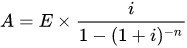

With :
- A : the annuity value
- E : value of capital borrowed
- i : interest rate
- n : number of periods

In [29]:
nan_annuity = active_credits[mask] # Mask for active credits without AMT_ANNUITY

# Define our formula
def f(x):
    i = 0.025 # Assumption
    return x['E'] * (i / (1-((1+i)**(-x['n']))))

# Apply on masked dataframe
nan_annuity['n'] = nan_annuity['DAYS_CREDIT_ENDDATE'].apply(lambda p: p / 365) # We assume payments are done yearly
nan_annuity['E'] = nan_annuity['AMT_CREDIT_SUM'] # We compute the annuity as if it's a new loan for the amount of remaining capital to be paid
nan_annuity['A'] = nan_annuity.apply(f, axis=1)

# Replace values on active_credits df
active_credits.loc[mask, 'AMT_ANNUITY'] = nan_annuity['A']
del nan_annuity

### c. Aggregations and feature engineering on bureau

For further computations of ratios about debt capacity, we will need the total amount and the annuity of loans stills actives. We will also look if there are overdues in current loans, which could be a red flag :

In [30]:
# Creation of a temporary df
df_temp = pd.DataFrame()

# Conditional aggregation on active loans
df_temp['BUREAU_TOTAL_ACTIVE_AMT_CREDIT_SUM'] = active_credits.groupby(by='SK_ID_CURR')['AMT_CREDIT_SUM'].sum()
df_temp['BUREAU_TOTAL_ACTIVE_AMT_ANNUITY'] = active_credits.groupby(by='SK_ID_CURR')['AMT_ANNUITY'].sum()
df_temp['BUREAU_TOTAL_AMT_CREDIT_SUM_OVERDUE'] = active_credits.groupby(by='SK_ID_CURR')['AMT_CREDIT_SUM_OVERDUE'].sum()
df_temp['BUREAU_TOTAL_DAYS_CREDIT_ENDDATE'] = active_credits.groupby(by='SK_ID_CURR')['DAYS_CREDIT_ENDDATE'].sum()

del active_credits

We also keep datas on others variables for all credits (both closed and active) with aggregations on SK_ID_CURR :

In [31]:
# Aggregation on numeric variables (description of variable in comments)
aggregations = {
    'DAYS_CREDIT': ['min', 'max', 'mean'], # How many days before current application did client apply for Credit Bureau credit
    'CREDIT_DAY_OVERDUE': ['max', 'mean'], # Number of days past due on CB credit at the time of application for related loan in our sample
    'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'], # Remaining duration of CB credit (in days) at the time of application in Home Credit
    'DAYS_ENDDATE_FACT': ['min', 'max', 'mean'], # Days since CB credit ended at the time of application in Home Credit (only for closed credit)
    'AMT_CREDIT_MAX_OVERDUE': ['max'], # Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)
    'CNT_CREDIT_PROLONG': ['sum'], # How many times was the Credit Bureau credit prolonged
    'AMT_CREDIT_SUM': ['max', 'mean', 'sum'], # Current credit amount for the Credit Bureau credit
    'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'], # Current debt on Credit Bureau credit
    'AMT_CREDIT_SUM_LIMIT': ['max', 'mean', 'sum'], # Current credit limit of credit card reported in Credit Bureau
    'AMT_CREDIT_SUM_OVERDUE': ['mean'], # Current amount overdue on Credit Bureau credit
    'DAYS_CREDIT_UPDATE': ['mean'], # How many days before loan application did last information about the Credit Bureau credit come
    'AMT_ANNUITY': ['max', 'mean', 'sum'], # Annuity of the Credit Bureau credit
    'STATUS_0_PERC': ['mean'], # Feature enginnering from previous step
    'STATUS_X_PERC': ['mean'], # Feature enginnering from previous step
    'STATUS_1_PERC': ['mean'], # Feature enginnering from previous step
    'STATUS_2_PERC': ['mean'], # Feature enginnering from previous step
    'STATUS_3_PERC': ['mean'], # Feature enginnering from previous step
    'STATUS_4_PERC': ['mean'], # Feature enginnering from previous step
    'STATUS_5_PERC': ['mean'], # Feature enginnering from previous step
}

bureau_agg = bureau.groupby('SK_ID_CURR').agg(aggregations)
bureau_agg.columns = pd.Index(['BUREAU_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])

bureau_agg = bureau_agg.join(df_temp, how='left', on='SK_ID_CURR')
del df_temp

In [32]:
# Aggregation on categorical variables, we will apply mode (description of variable in comments)
cat_var = [
    'CREDIT_ACTIVE', # Status of the Credit Bureau (CB) reported credits
    'CREDIT_CURRENCY', # Recoded currency of the Credit Bureau credit
    'CREDIT_TYPE' # Type of Credit Bureau credit (Car, cash,...)
]

for var in cat_var:
    bureau_agg['BUREAU_' + var + '_MODE'] = bureau.groupby('SK_ID_CURR')[var].agg(pd.Series.mode)
    bureau_agg['BUREAU_' + var + '_MODE'] = bureau_agg['BUREAU_' + var + '_MODE'].apply(lambda x: select_one_mode_value(x))

### d. Jointure

In [33]:
# Looking nb of loans in application_data without information on bureau
perc_loans = len(set(application_data['SK_ID_CURR']) - set(bureau['SK_ID_CURR'])) / len(set(application_data['SK_ID_CURR']))
print("Percentage of loans application_data without information on bureau : {:.2%}".format(perc_loans))

Percentage of loans application_data without information on bureau : 14.31%


In [34]:
# Merging dataframes
application_data = application_data.join(bureau_agg, how='left', on='SK_ID_CURR')
del bureau_agg
del bureau

## III - previous_application and application_data <a class="anchor" id="5-bullet"></a>

The dataframe previous_application gives us information on clients about their previous credit/application at Home Credit (several rows for each client, FK : SK_ID_CURR). We will synthetize elements to get one row per SK_ID_CURR

### a. Analysis of previous_application

In [35]:
print(previous_application.shape)
previous_application.head()

(1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
previous_application.isna().sum()[previous_application.isna().sum() > 0]

AMT_ANNUITY                   372235
AMT_CREDIT                         1
AMT_DOWN_PAYMENT              895844
AMT_GOODS_PRICE               385515
RATE_DOWN_PAYMENT             895844
RATE_INTEREST_PRIMARY        1664263
RATE_INTEREST_PRIVILEGED     1664263
NAME_TYPE_SUITE               820405
CNT_PAYMENT                   372230
PRODUCT_COMBINATION              346
DAYS_FIRST_DRAWING            673065
DAYS_FIRST_DUE                673065
DAYS_LAST_DUE_1ST_VERSION     673065
DAYS_LAST_DUE                 673065
DAYS_TERMINATION              673065
NFLAG_INSURED_ON_APPROVAL     673065
dtype: int64

In [37]:
previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### b. Cleaning

In [38]:
# Some days values are 365.243, we will replace by NaN

previous_application['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
previous_application['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
previous_application['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
previous_application['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
previous_application['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)

### c. Aggregations and feature engineering on previous_application

In [39]:
# Feature engineering

# Value ask / value received percentage
previous_application['APP_CREDIT_PERC'] = previous_application['AMT_APPLICATION'] / previous_application['AMT_CREDIT']

# LTV (% of goods financed with the credit)
previous_application['LTV_RATIO'] = previous_application['AMT_CREDIT'] / previous_application['AMT_GOODS_PRICE']

In [40]:
# Previous applications numeric features
num_aggregations = {
    'AMT_ANNUITY': ['min', 'max', 'mean'], # Annuity of previous application
    'AMT_APPLICATION': ['min', 'max', 'mean'], # For how much credit did client ask on the previous application
    'AMT_CREDIT': ['min', 'max', 'mean'], # Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT
    'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'], # Down payment on the previous application
    'AMT_GOODS_PRICE': ['min', 'max', 'mean'], # Goods price of good that client asked for (if applicable) on the previous application
    'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'], # Approximately at what day hour did the client apply for the previous application
    #'NFLAG_LAST_APPL_IN_DAY' : ['min', 'max', 'mean'], # Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice
    #'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'], # Down payment rate normalized on previous credit
    #'RATE_INTEREST_PRIMARY' : ['min', 'max', 'mean'], # Interest rate normalized on previous credit
    #'RATE_INTEREST_PRIVILEGED' : ['min', 'max', 'mean'], # Interest rate normalized on previous credit
    'DAYS_DECISION': ['min', 'max', 'mean'], # Relative to current application when was the decision about previous application made
    #'SELLERPLACE_AREA', ['min', 'max', 'mean'], # Selling area of seller place of the previous application
    'CNT_PAYMENT': ['mean', 'sum'], # Term of previous credit at application of the previous application
    #'DAYS_FIRST_DRAWING' : ['min', 'max', 'mean'], # Relative to application date of current application when was the first disbursement of the previous application
    #'DAYS_FIRST_DUE' : ['min', 'max', 'mean'], # Relative to application date of current application when was the first due supposed to be of the previous application
    #'DAYS_LAST_DUE_1ST_VERSION' : ['min', 'max', 'mean'], # Relative to application date of current application when was the first due of the previous application
    #'DAYS_LAST_DUE' : ['min', 'max', 'mean'], # Relative to application date of current application when was the last due date of the previous application
    #'DAYS_TERMINATION' : ['min', 'max', 'mean'], # Relative to application date of current application when was the expected termination of the previous application
    #'NFLAG_INSURED_ON_APPROVAL' : ['min', 'max', 'mean'], # Did the client requested insurance during the previous application
    'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'], # Feature enginnering from previous step
    'LTV_RATIO' : ['min', 'max', 'mean', 'var'], # Feature enginnering from previous step
}

prev_agg = previous_application.groupby('SK_ID_CURR').agg(num_aggregations)
prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])

# Previous Applications: Approved Applications - only numerical features
approved = previous_application[previous_application['NAME_CONTRACT_STATUS'] == 'Approved']
approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')

# Previous Applications: Refused Applications - only numerical features
refused = previous_application[previous_application['NAME_CONTRACT_STATUS'] == 'Refused']
refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
del refused, refused_agg, approved, approved_agg

In [41]:
# Aggregation on categorical variables, we will apply mode (description of variable in comments)
cat_var = [
    'NAME_CONTRACT_TYPE', # Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application
    'WEEKDAY_APPR_PROCESS_START', # On which day of the week did the client apply for previous application
    'FLAG_LAST_APPL_PER_CONTRACT', # Flag if it was last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one single contract
    'NFLAG_LAST_APPL_IN_DAY', # Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice
    'NAME_CASH_LOAN_PURPOSE', # Purpose of the cash loan
    'NAME_CONTRACT_STATUS', # Contract status (approved, cancelled, ...) of previous application
    'NAME_PAYMENT_TYPE', # Payment method that client chose to pay for the previous application
    'CODE_REJECT_REASON', # Why was the previous application rejected
    'NAME_TYPE_SUITE', # Who accompanied client when applying for the previous application
    'NAME_CLIENT_TYPE', # Was the client old or new client when applying for the previous application
    'NAME_GOODS_CATEGORY', # What kind of goods did the client apply for in the previous application
    'NAME_PORTFOLIO', # Was the previous application for CASH, POS, CAR, …
    'NAME_PRODUCT_TYPE', # Was the previous application x-sell o walk-in
    'CHANNEL_TYPE', # Through which channel we acquired the client on the previous application
    'NAME_SELLER_INDUSTRY', # The industry of the seller
    'NAME_YIELD_GROUP', # Grouped interest rate into small medium and high of the previous application
    'PRODUCT_COMBINATION', # Detailed product combination of the previous application
]

for var in cat_var:
    prev_agg['PREV_' + var + '_MODE'] = previous_application.groupby('SK_ID_CURR')[var].agg(pd.Series.mode)
    prev_agg['PREV_' + var + '_MODE'] = prev_agg['PREV_' + var + '_MODE'].apply(lambda x: select_one_mode_value(x))

### d. Jointure

In [42]:
# Looking nb of credits in application_data without information on previous_application
perc_loans = len(set(application_data['SK_ID_CURR']) - set(previous_application['SK_ID_CURR'])) / len(set(application_data['SK_ID_CURR']))
print("Percentage of loans application_data without information on previous_application : {:.2%}".format(perc_loans))

Percentage of loans application_data without information on previous_application : 5.35%


In [43]:
# Merging dataframes
application_data = application_data.join(prev_agg, how='left', on='SK_ID_CURR')
del prev_agg
del previous_application

## IV - credit_card_balance and application_data <a class="anchor" id="6-bullet"></a>

The dataframe credit_card_balance gives us monthly balances information of clients for each previous credit/application at Home Credit (several rows for each application, FK : SK_ID_CURR). We will synthetize elements to get one row per SK_ID_CURR

### a. Analysis of credit_card_balance

In [44]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


### b. Aggregations and feature engineering on credit_card_balance

In [45]:
# Aggregations on numeric variables (description of variable in comments)
aggregations = {
    'MONTHS_BALANCE': ['max', 'mean', 'sum', 'var'], # Month of balance relative to application date (-1 means the freshest balance date)
    'AMT_BALANCE': ['max', 'mean', 'sum', 'var'], # Balance during the month of previous credit
    'AMT_CREDIT_LIMIT_ACTUAL': ['max', 'mean', 'sum', 'var'], # Credit card limit during the month of the previous credit
    'AMT_DRAWINGS_ATM_CURRENT': ['max', 'mean', 'sum', 'var'], # Amount drawing at ATM during the month of the previous credit
    'AMT_DRAWINGS_CURRENT': ['max', 'mean', 'sum', 'var'], # Amount drawing during the month of the previous credit
    'AMT_DRAWINGS_OTHER_CURRENT': ['max', 'mean', 'sum', 'var'], # Amount of other drawings during the month of the previous credit
    'AMT_DRAWINGS_POS_CURRENT': ['max', 'mean', 'sum', 'var'], # Amount drawing or buying goods during the month of the previous credit
    'AMT_INST_MIN_REGULARITY': ['max', 'mean', 'sum', 'var'], # Minimal installment for this month of the previous credit
    'AMT_PAYMENT_CURRENT': ['max', 'mean', 'sum', 'var'], # How much did the client pay during the month on the previous credit
    'AMT_PAYMENT_TOTAL_CURRENT': ['max', 'mean', 'sum', 'var'], # How much did the client pay during the month in total on the previous credit
    'AMT_RECEIVABLE_PRINCIPAL': ['max', 'mean', 'sum', 'var'], # Amount receivable for principal on the previous credit
    'AMT_RECIVABLE': ['max', 'mean', 'sum', 'var'], # Amount receivable on the previous credit
    'AMT_TOTAL_RECEIVABLE': ['max', 'mean', 'sum', 'var'], # Total amount receivable on the previous credit
    'CNT_DRAWINGS_ATM_CURRENT': ['max', 'mean', 'sum', 'var'], # Number of drawings at ATM during this month on the previous credit
    'CNT_DRAWINGS_CURRENT': ['max', 'mean', 'sum', 'var'], # Number of drawings during this month on the previous credit
    'CNT_DRAWINGS_OTHER_CURRENT': ['max', 'mean', 'sum', 'var'], # Number of other drawings during this month on the previous credit
    'CNT_DRAWINGS_POS_CURRENT': ['max', 'mean', 'sum', 'var'], # Number of drawings for goods during this month on the previous credit
    'CNT_INSTALMENT_MATURE_CUM': ['max', 'mean', 'sum', 'var'], # Number of paid installments on the previous credit
    'SK_DPD': ['max', 'mean', 'sum', 'var'], # DPD (Days past due) during the month on the previous credit
    'SK_DPD_DEF': ['max', 'mean', 'sum', 'var'], # DPD (Days past due) during the month with tolerance (debts with low loan amounts are ignored) of the previous credit
}

cc_agg = credit_card_balance.groupby('SK_ID_CURR').agg(aggregations)
cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])

# Count installments accounts
cc_agg['CC_COUNT'] = credit_card_balance.groupby('SK_ID_CURR').size()

In [46]:
# Aggregation on categorical variables, we will apply mode
cat_var = [
    'NAME_CONTRACT_STATUS' # Contract status (active signed,...) on the previous credit
]

for var in cat_var:
    cc_agg['CC_' + var + '_MODE'] = credit_card_balance.groupby('SK_ID_CURR')[var].agg(pd.Series.mode)
    cc_agg['CC_' + var + '_MODE'] = cc_agg['CC_' + var + '_MODE'].apply(lambda x: select_one_mode_value(x))

### c. Jointure

In [47]:
# Looking nb of credits in application_data without information on credit_card_balance
perc_loans = len(set(application_data['SK_ID_CURR']) - set(credit_card_balance['SK_ID_CURR'])) / len(set(application_data['SK_ID_CURR']))
print("Percentage of loans application_data without information on credit_card_balance : {:.2%}".format(perc_loans))

Percentage of loans application_data without information on credit_card_balance : 71.74%


In [48]:
# Merging dataframes
application_data = application_data.join(cc_agg, how='left', on='SK_ID_CURR')
del cc_agg
del credit_card_balance

## V - POS_CASH_balance and application_data <a class="anchor" id="7-bullet"></a>

The dataframe POS_CASH_balance gives us monthly balances information of clients for each previous credit/application at Home Credit (several rows for each application, FK : SK_ID_CURR). We will synthetize elements to get one row per SK_ID_CURR

### a. Analysis of POS_CASH_balance

In [49]:
print(POS_CASH_balance.shape)
POS_CASH_balance.head()

(10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [50]:
POS_CASH_balance.isna().sum()[POS_CASH_balance.isna().sum() > 0]

CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
dtype: int64

### b. Aggregations and feature engineering on POS_CASH_balance

In [51]:
# Aggregations on numeric variables (description of variable in comments)
aggregations = {
    'MONTHS_BALANCE': ['max', 'mean', 'size'], # Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )
    #'CNT_INSTALMENT': ['max', 'mean', 'sum', 'var'], # Term of previous credit (can change over time)
    #'CNT_INSTALMENT_FUTURE': ['max', 'mean', 'sum', 'var'], # Installments left to pay on the previous credit
    'SK_DPD': ['max', 'mean'], # DPD (days past due) during the month of previous credit
    'SK_DPD_DEF': ['max', 'mean'], # DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit
}

pos_agg = POS_CASH_balance.groupby('SK_ID_CURR').agg(aggregations)
pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])

# Count installments accounts
pos_agg['POS_COUNT'] = POS_CASH_balance.groupby('SK_ID_CURR').size()

In [52]:
# Aggregation on categorical variables, we will apply mode
cat_var = [
    'NAME_CONTRACT_STATUS' # Contract status during the month
]

for var in cat_var:
    pos_agg['POS_' + var + '_MODE'] = POS_CASH_balance.groupby('SK_ID_CURR')[var].agg(pd.Series.mode)
    pos_agg['POS_' + var + '_MODE'] = pos_agg['POS_' + var + '_MODE'].apply(lambda x: select_one_mode_value(x))

### c. Jointure

In [53]:
# Looking nb of credits in application_data without information on POS_CASH_balance
perc_loans = len(set(application_data['SK_ID_CURR']) - set(POS_CASH_balance['SK_ID_CURR'])) / len(set(application_data['SK_ID_CURR']))
print("Percentage of loans application_data without information on POS_CASH_balance : {:.2%}".format(perc_loans))

Percentage of loans application_data without information on credit_card_balance : 5.88%


In [54]:
# Merging dataframes
application_data = application_data.join(pos_agg, how='left', on='SK_ID_CURR')
del pos_agg
del POS_CASH_balance

## VI - installments_payments and application_data <a class="anchor" id="8-bullet"></a>

The dataframe installments_payments gives us information on installments for each previous credit/application at Home Credit (several rows for each application, FK : SK_ID_CURR). We will synthetize installments elements to get one row per SK_ID_CURR

### a. Analysis of installments_payments

In [55]:
print(installments_payments.shape)
installments_payments.head()

(13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [56]:
installments_payments.isna().sum()[installments_payments.isna().sum() > 0]

DAYS_ENTRY_PAYMENT    2905
AMT_PAYMENT           2905
dtype: int64

In [57]:
installments_payments.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


### b. Aggregations and feature engineering on installments_payments

For feature engineering we will look if the client paid the the entirety of the installment and if he paid on time :

In [58]:
# Feature engineering

# Percentage and difference paid in each installment (amount paid and installment value)
installments_payments['PAYMENT_PERC'] = installments_payments['AMT_PAYMENT'] / installments_payments['AMT_INSTALMENT']
installments_payments['PAYMENT_DIFF'] = installments_payments['AMT_INSTALMENT'] - installments_payments['AMT_PAYMENT']

# Days past due and days before due (no negative values)
installments_payments['DPD'] = installments_payments['DAYS_ENTRY_PAYMENT'] - installments_payments['DAYS_INSTALMENT']
installments_payments['DBD'] = installments_payments['DAYS_INSTALMENT'] - installments_payments['DAYS_ENTRY_PAYMENT']
installments_payments['DPD'] = installments_payments['DPD'].apply(lambda x: x if x > 0 else 0)
installments_payments['DBD'] = installments_payments['DBD'].apply(lambda x: x if x > 0 else 0)

Agregation of others features on SK_ID_PREV :

In [59]:
# Features: Perform aggregations (description of variable in comments)
aggregations = {
    'NUM_INSTALMENT_VERSION': ['nunique'], # Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed
    #'NUM_INSTALMENT_NUMBER': ['nunique'], # On which installment we observe payment
    #'DAYS_INSTALMENT': ['max', 'mean', 'sum'], # When the installment of previous credit was supposed to be paid (relative to application date of current loan)
    'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum'], # When was the installments of previous credit paid actually (relative to application date of current loan)
    'AMT_INSTALMENT': ['max', 'mean', 'sum'], # What was the prescribed installment amount of previous credit on this installment
    'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'], # What the client actually paid on previous credit on this installment
    'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'], # Feature enginnering from previous step
    'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'], # Feature enginnering from previous step
    'DPD': ['max', 'mean', 'sum'], # Feature enginnering from previous step
    'DBD': ['max', 'mean', 'sum'], # Feature enginnering from previous step
}

ins_agg = installments_payments.groupby('SK_ID_CURR').agg(aggregations)
ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])

# Count installments accounts
ins_agg['INSTAL_COUNT'] = installments_payments.groupby('SK_ID_CURR').size()

### c. Jointure

In [60]:
# Looking nb of credits in application_data without information on installments_payments
perc_loans = len(set(application_data['SK_ID_CURR']) - set(installments_payments['SK_ID_CURR'])) / len(set(application_data['SK_ID_CURR']))
print("Percentage of loans application_data without information on installments_payments : {:.2%}".format(perc_loans))

Percentage of loans application_data without information on installments_payments : 5.16%


In [61]:
# Merging dataframes
application_data = application_data.join(ins_agg, how='left', on='SK_ID_CURR')
del ins_agg
del installments_payments

# 3. Feature engineering <a class="anchor" id="9-bullet"></a>

In [73]:
print(application_data.shape)
application_data.head()

(307511, 390)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,...,CC_AMT_RECEIVABLE_PRINCIPAL_SUM,CC_AMT_RECEIVABLE_PRINCIPAL_VAR,CC_AMT_RECIVABLE_MAX,CC_AMT_RECIVABLE_MEAN,CC_AMT_RECIVABLE_SUM,CC_AMT_RECIVABLE_VAR,CC_AMT_TOTAL_RECEIVABLE_MAX,CC_AMT_TOTAL_RECEIVABLE_MEAN,CC_AMT_TOTAL_RECEIVABLE_SUM,CC_AMT_TOTAL_RECEIVABLE_VAR,CC_CNT_DRAWINGS_ATM_CURRENT_MAX,CC_CNT_DRAWINGS_ATM_CURRENT_MEAN,CC_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_CNT_DRAWINGS_ATM_CURRENT_VAR,CC_CNT_DRAWINGS_CURRENT_MAX,CC_CNT_DRAWINGS_CURRENT_MEAN,CC_CNT_DRAWINGS_CURRENT_SUM,CC_CNT_DRAWINGS_CURRENT_VAR,CC_CNT_DRAWINGS_OTHER_CURRENT_MAX,CC_CNT_DRAWINGS_OTHER_CURRENT_MEAN,CC_CNT_DRAWINGS_OTHER_CURRENT_SUM,CC_CNT_DRAWINGS_OTHER_CURRENT_VAR,CC_CNT_DRAWINGS_POS_CURRENT_MAX,CC_CNT_DRAWINGS_POS_CURRENT_MEAN,CC_CNT_DRAWINGS_POS_CURRENT_SUM,CC_CNT_DRAWINGS_POS_CURRENT_VAR,CC_CNT_INSTALMENT_MATURE_CUM_MAX,CC_CNT_INSTALMENT_MATURE_CUM_MEAN,CC_CNT_INSTALMENT_MATURE_CUM_SUM,CC_CNT_INSTALMENT_MATURE_CUM_VAR,CC_SK_DPD_MAX,CC_SK_DPD_MEAN,CC_SK_DPD_SUM,CC_SK_DPD_VAR,CC_SK_DPD_DEF_MAX,CC_SK_DPD_DEF_MEAN,CC_SK_DPD_DEF_SUM,CC_SK_DPD_DEF_VAR,CC_COUNT,CC_NAME_CONTRACT_STATUS_MODE,POS_MONTHS_BALANCE_MAX,POS_MONTHS_BALANCE_MEAN,POS_MONTHS_BALANCE_SIZE,POS_SK_DPD_MAX,POS_SK_DPD_MEAN,POS_SK_DPD_DEF_MAX,POS_SK_DPD_DEF_MEAN,POS_COUNT,POS_NAME_CONTRACT_STATUS_MODE,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,INSTAL_AMT_INSTALMENT_MAX,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_INSTALMENT_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_PAYMENT_PERC_MAX,INSTAL_PAYMENT_PERC_MEAN,INSTAL_PAYMENT_PERC_SUM,INSTAL_PAYMENT_PERC_VAR,INSTAL_PAYMENT_DIFF_MAX,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_PAYMENT_DIFF_SUM,INSTAL_PAYMENT_DIFF_VAR,INSTAL_DPD_MAX,INSTAL_DPD_MEAN,INSTAL_DPD_SUM,INSTAL_DBD_MAX,INSTAL_DBD_MEAN,INSTAL_DBD_SUM,INSTAL_COUNT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-10.000000,19.0,0.0,0.0,0.0,0.0,19.0,Active,2.0,-49.0,-315.421053,-5993.0,53093.745,11559.247105,219625.695,9251.775,53093.745,11559.247105,219625.695,1.0,1.0

In [76]:
application_data.isna().mean()[application_data.isna().mean() > 0.5].sort_values(ascending=False)

PREV_NFLAG_LAST_APPL_IN_DAY_MODE        0.999707
REFUSED_AMT_DOWN_PAYMENT_MAX            0.853111
REFUSED_AMT_DOWN_PAYMENT_MEAN           0.853111
REFUSED_AMT_DOWN_PAYMENT_MIN            0.853111
REFUSED_LTV_RATIO_VAR                   0.849560
REFUSED_APP_CREDIT_PERC_VAR             0.840136
CC_AMT_PAYMENT_CURRENT_VAR              0.802872
CC_CNT_DRAWINGS_OTHER_CURRENT_VAR       0.802631
CC_AMT_DRAWINGS_ATM_CURRENT_VAR         0.802631
CC_CNT_DRAWINGS_POS_CURRENT_VAR         0.802631
CC_AMT_DRAWINGS_OTHER_CURRENT_VAR       0.802631
CC_CNT_DRAWINGS_ATM_CURRENT_VAR         0.802631
CC_AMT_DRAWINGS_POS_CURRENT_VAR         0.802631
CC_AMT_PAYMENT_CURRENT_MEAN             0.801438
CC_AMT_PAYMENT_CURRENT_MAX              0.801438
CC_CNT_DRAWINGS_ATM_CURRENT_MEAN        0.801178
CC_CNT_DRAWINGS_OTHER_CURRENT_MEAN      0.801178
CC_CNT_DRAWINGS_ATM_CURRENT_MAX         0.801178
CC_AMT_DRAWINGS_POS_CURRENT_MAX         0.801178
CC_AMT_DRAWINGS_POS_CURRENT_MEAN        0.801178
CC_CNT_DRAWINGS_OTHE

In [77]:
# Cleaning

# Optional: Remove 4 applications with XNA CODE_GENDER (train set)
application_data = application_data[application_data['CODE_GENDER'] != 'XNA']

# NaN values for DAYS_EMPLOYED: 365.243 -> nan
application_data['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)

In [79]:
# Ratios on current loan
application_data['CURRENT_LOAN_EFFORT_RATE'] = application_data['AMT_ANNUITY'] / application_data['AMT_INCOME_TOTAL']
application_data['CURRENT_LOAN_LTV'] = application_data['AMT_CREDIT'] / application_data['AMT_GOODS_PRICE']
application_data['CURRENT_LOAN_INCOME_CREDIT_PERC'] = application_data['AMT_INCOME_TOTAL'] / application_data['AMT_CREDIT']
application_data['CURRENT_LOAN_PAYMENT_RATE'] = application_data['AMT_ANNUITY'] / application_data['AMT_CREDIT']

# Aggregation of amounts on current loan + other actives bureau loans
application_data['TOTAL_AMT_ANNUITY'] = application_data['AMT_ANNUITY'] + application_data['BUREAU_TOTAL_ACTIVE_AMT_ANNUITY']
application_data['TOTAL_AMT_CREDIT'] = application_data['AMT_CREDIT'] + application_data['BUREAU_TOTAL_ACTIVE_AMT_CREDIT_SUM']

# Ratios on current loan + other actives bureau loans
application_data['TOTAL_EFFORT_RATE'] = application_data['TOTAL_AMT_ANNUITY'] / application_data['AMT_INCOME_TOTAL']
application_data['TOTAL_INCOME_CREDIT_PERC'] = application_data['AMT_INCOME_TOTAL'] / application_data['TOTAL_AMT_CREDIT']
application_data['TOTAL_PAYMENT_RATE'] = application_data['TOTAL_AMT_ANNUITY'] / application_data['TOTAL_AMT_CREDIT']

# Other relevant ratios
application_data['DAYS_EMPLOYED_PERC'] = application_data['DAYS_EMPLOYED'] / application_data['DAYS_BIRTH']
application_data['INCOME_PER_PERSON'] = application_data['AMT_INCOME_TOTAL'] / application_data['CNT_FAM_MEMBERS']

In [80]:
application_data.to_csv('./Clean_datas/clean_data_1.csv')